In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
pd.set_option('display.max_rows', None)  # Para mostrar todas as linhas se necessário
pd.set_option('display.max_columns', None)  # Para mostrar todas as colunas
pd.set_option('display.max_colwidth', None)  # Para mostrar todo o conteúdo de cada célula sem truncar


In [3]:
df = pd.read_csv("/Users/bolsolui/Documents/personal/MECAI/git/rais_dados/bayes/df_dummies.csv")
# Codificando a variável 'sexo' como numérica (0 para F e 1 para M)
df['sexo_cod'] = df['sexo'].map({'F': 0, 'M': 1})
df.drop('sexo',axis='columns', inplace=True)

df.head()

,faixa_remuneracao_media_sm,Produção de lavouras temporárias,Horticultura e floricultura,Produção de lavouras permanentes,Produção de sementes e mudas certificadas,Pecuária,Atividades de apoio à agricultura e à pecuária,Caça e serviços relacionados,Produção florestal - florestas plantadas,Produção florestal - florestas nativas,Atividades de apoio à produção florestal,Pesca,Aqüicultura,Extração de carvão mineral,Extração de petróleo e gás natural,Extração de minério de ferro,Extração de minerais metálicos não-ferrosos,"Extração de pedra, areia e argila",Extração de outros minerais não-metálicos,Atividades de apoio à extração de petróleo e gás natural,"Atividades de apoio à extração de minerais, exceto petróleo e gás natural",Abate e fabricação de produtos de carne,Preservação do pescado e fabricação de produtos do pescado,"Fabricação de conservas de frutas, legumes e outros vegetais",Fabricação de óleos e gorduras vegetais e animais,Laticínios,"Moagem, fabricação de produtos amiláceos e de alimentos para animais",Fabricação e refino de açúcar,Torrefação e moagem de café,Fabricação de outros produtos alimentícios,Fabricação de bebidas alcoólicas,Fabricação de bebidas não-alcoólicas,Processamento industrial do fumo,Fabricação de produtos do fumo,Preparação e fiação de fibras têxteis,"Tecelagem, exceto malha",Fabricação de tecidos de malha,"Acabamentos em fios, tecidos e artefatos têxteis","Fabricação de artefatos têxteis, exceto vestuário",Confecção de artigos do vestuário e acessórios,Fabricação de artigos de malharia e tricotagem,Curtimento e outras preparações de couro,Fabricação de artigos para viagem e de artefatos diversos de couro,Fabricação de calçados,"Fabricação de partes para calçados, de qualquer material",Desdobramento de madeira,"Fabricação de produtos de madeira, cortiça e material trançado, exceto móveis",Fabricação de celulose e outras pastas para a fabricação de papel,"Fabricação de papel, cartolina e papel-cartão","Fabricação de embalagens de papel, cartolina, papel-cartão e papelão ondulado","Fabricação de produtos diversos de papel, cartolina, papel-cartão e papelão ondulado",Atividade de impressão,Serviços de pré-impressão e acabamentos gráficos,Reprodução de materiais gravados em qualquer suporte,Coquerias,Fabricação de produtos derivados do petróleo,Fabricação de biocombustíveis,Fabricação de produtos químicos inorgânicos,Fabricação de produtos químicos orgânicos,Fabricação de resinas e elastômeros,Fabricação de fibras artificiais e sintéticas,Fabricação de defensivos agrícolas e desinfestantes domissanitários,"Fabricação de sabões, detergentes, produtos de limpeza, cosméticos, produtos de perfumaria e de higiene pessoal","Fabricação de tintas, vernizes, esmaltes, lacas e produtos afins",Fabricação de produtos e preparados químicos diversos,Fabricação de produtos farmoquímicos,Fabricação de produtos farmacêuticos,Fabricação de produtos de borracha,Fabricação de produtos de material plástico,Fabricação de vidro e de produtos do vidro,Fabricação de cimento,"Fabricação de artefatos de concreto, cimento, fibrocimento, gesso e materiais semelhantes",Fabricação de produtos cerâmicos,Aparelhamento de pedras e fabricação de outros produtos de minerais não-metálicos,Produção de ferro-gusa e de ferroligas,Siderurgia,"Produção de tubos de aço, exceto tubos sem costura",Metalurgia dos metais não-ferrosos,Fundição,Fabricação de estruturas metálicas e obras de caldeiraria pesada,"Fabricação de tanques, reservatórios metálicos e caldeiras","Forjaria, estamparia, metalurgia do pó e serviços de tratamento de metais","Fabricação de artigos de cutelaria, de serralheria e ferramentas","Fabricação de equipamento bélico pesado, armas de fogo e munições",Fabricação de produtos de metal não especificados anteriormente,Fabricação de componentes eletrônicos,Fabricação de equipamentos de informática e periféricos,Fabricação de equipamentos de comunicação,"Fabricação de aparelhos de recepção, reprodução, gravação e amplificação de áu

In [14]:
df_f = df[df["sexo_cod"]==0].groupby([ 'faixa_remuneracao_media_sm'])['total_pessoas'].sum().reset_index()
# Plotando os dados
plt.figure(figsize=(10, 6))
plt.bar(df['faixa_remuneracao_media_sm'], df_f['total_pessoas'], color='skyblue')
plt.title('Distribuição de Pessoas por Faixa de Remuneração Média (SM)')
plt.xlabel('Faixa de Remuneração Média (SM)')
plt.ylabel('Total de Pessoas')
plt.xticks(df['faixa_remuneracao_media_sm'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

,faixa_remuneracao_media_sm,total_pessoas
0,0,51989
1,1,329595
2,2,2460601
3,3,1282850
4,4,1201134
5,5,703759
6,6,480686
7,7,592380
8,8,410419
9,9,284331


In [16]:
df_agrup_temp =df.groupby([ 'faixa_remuneracao_media_sm',"sexo"])['total_pessoas'].sum().reset_index()

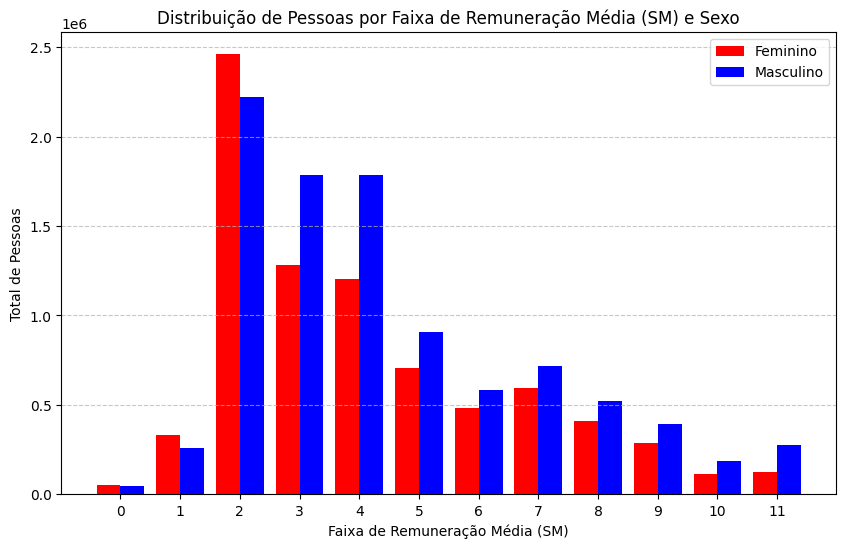

In [18]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotando os dados
# Separa os dados por sexo
df_feminino = df_agrup_temp[df_agrup_temp['sexo'] == 'F']
df_masculino = df_agrup_temp[df_agrup_temp['sexo'] == 'M']

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Plota as barras para feminino em vermelho
plt.bar(df_feminino['faixa_remuneracao_media_sm'] - 0.2, df_feminino['total_pessoas'],
        color='red', width=0.4, label='Feminino')

# Plota as barras para masculino em azul, com um pequeno deslocamento para não sobrepor as barras de feminino
plt.bar(df_masculino['faixa_remuneracao_media_sm'] + 0.2, df_masculino['total_pessoas'],
        color='blue', width=0.4, label='Masculino')

# Adiciona títulos e labels
plt.title('Distribuição de Pessoas por Faixa de Remuneração Média (SM) e Sexo')
plt.xlabel('Faixa de Remuneração Média (SM)')
plt.ylabel('Total de Pessoas')
plt.xticks(df_agrup_temp['faixa_remuneracao_media_sm'].unique())
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra o gráfico
plt.show()


Vou pegar a saida do modelo lasso de feature selection para passar como parametro aqui no modelo de bayes pq com todas as variaveis eu nao to tendo processamento na maquina para rodar


In [22]:
df.head()

,faixa_remuneracao_media_sm,Produção de lavouras temporárias,Horticultura e floricultura,Produção de lavouras permanentes,Produção de sementes e mudas certificadas,Pecuária,Atividades de apoio à agricultura e à pecuária,Caça e serviços relacionados,Produção florestal - florestas plantadas,Produção florestal - florestas nativas,Atividades de apoio à produção florestal,Pesca,Aqüicultura,Extração de carvão mineral,Extração de petróleo e gás natural,Extração de minério de ferro,Extração de minerais metálicos não-ferrosos,"Extração de pedra, areia e argila",Extração de outros minerais não-metálicos,Atividades de apoio à extração de petróleo e gás natural,"Atividades de apoio à extração de minerais, exceto petróleo e gás natural",Abate e fabricação de produtos de carne,Preservação do pescado e fabricação de produtos do pescado,"Fabricação de conservas de frutas, legumes e outros vegetais",Fabricação de óleos e gorduras vegetais e animais,Laticínios,"Moagem, fabricação de produtos amiláceos e de alimentos para animais",Fabricação e refino de açúcar,Torrefação e moagem de café,Fabricação de outros produtos alimentícios,Fabricação de bebidas alcoólicas,Fabricação de bebidas não-alcoólicas,Processamento industrial do fumo,Fabricação de produtos do fumo,Preparação e fiação de fibras têxteis,"Tecelagem, exceto malha",Fabricação de tecidos de malha,"Acabamentos em fios, tecidos e artefatos têxteis","Fabricação de artefatos têxteis, exceto vestuário",Confecção de artigos do vestuário e acessórios,Fabricação de artigos de malharia e tricotagem,Curtimento e outras preparações de couro,Fabricação de artigos para viagem e de artefatos diversos de couro,Fabricação de calçados,"Fabricação de partes para calçados, de qualquer material",Desdobramento de madeira,"Fabricação de produtos de madeira, cortiça e material trançado, exceto móveis",Fabricação de celulose e outras pastas para a fabricação de papel,"Fabricação de papel, cartolina e papel-cartão","Fabricação de embalagens de papel, cartolina, papel-cartão e papelão ondulado","Fabricação de produtos diversos de papel, cartolina, papel-cartão e papelão ondulado",Atividade de impressão,Serviços de pré-impressão e acabamentos gráficos,Reprodução de materiais gravados em qualquer suporte,Coquerias,Fabricação de produtos derivados do petróleo,Fabricação de biocombustíveis,Fabricação de produtos químicos inorgânicos,Fabricação de produtos químicos orgânicos,Fabricação de resinas e elastômeros,Fabricação de fibras artificiais e sintéticas,Fabricação de defensivos agrícolas e desinfestantes domissanitários,"Fabricação de sabões, detergentes, produtos de limpeza, cosméticos, produtos de perfumaria e de higiene pessoal","Fabricação de tintas, vernizes, esmaltes, lacas e produtos afins",Fabricação de produtos e preparados químicos diversos,Fabricação de produtos farmoquímicos,Fabricação de produtos farmacêuticos,Fabricação de produtos de borracha,Fabricação de produtos de material plástico,Fabricação de vidro e de produtos do vidro,Fabricação de cimento,"Fabricação de artefatos de concreto, cimento, fibrocimento, gesso e materiais semelhantes",Fabricação de produtos cerâmicos,Aparelhamento de pedras e fabricação de outros produtos de minerais não-metálicos,Produção de ferro-gusa e de ferroligas,Siderurgia,"Produção de tubos de aço, exceto tubos sem costura",Metalurgia dos metais não-ferrosos,Fundição,Fabricação de estruturas metálicas e obras de caldeiraria pesada,"Fabricação de tanques, reservatórios metálicos e caldeiras","Forjaria, estamparia, metalurgia do pó e serviços de tratamento de metais","Fabricação de artigos de cutelaria, de serralheria e ferramentas","Fabricação de equipamento bélico pesado, armas de fogo e munições",Fabricação de produtos de metal não especificados anteriormente,Fabricação de componentes eletrônicos,Fabricação de equipamentos de informática e periféricos,Fabricação de equipamentos de comunicação,"Fabricação de aparelhos de recepção, reprodução, gravação e amplificação de áu

In [4]:
lasso_result=[
"faixa_remuneracao_media_sm",
"sexo_cod" ,
"Construção de edifícios",
"Comércio de veículos automotores",
"Comércio de peças e acessórios para veículos automotores",
"Comércio varejista de produtos alimentícios, bebidas e fumo",
"Comércio varejista de combustíveis para veículos automotores",
"Comércio varejista de material de construção",
"Comércio varejista de equipamentos de informática e comunicação",
"Comércio varejista de produtos farmacêuticos, perfumaria e cosméticos e artigos médicos, ópticos e ortopédicos",
"Comércio varejista de produtos novos não especificados anteriormente e de produtos usados",
"Hotéis e similares",
"Planos de saúde",
"Atividades de contabilidade, consultoria e auditoria contábil e tributária",
"Atividades de vigilância, segurança privada e transporte de valores",
"Atividades de teleatendimento",
"Serviços coletivos prestados pela administração pública",
"Educação superior",
"Atividades de serviços de complementação diagnóstica e terapêutica",
"Atividades de profissionais da área de saúde, exceto médicos e odontólogos",
"Atividades de atenção à saúde humana não especificadas anteriormente",
"Atividades esportivas",
"Atividades de organizações associativas patronais, empresariais e profissionais",
"Atividades de organizações sindicais",
"Atividades de organizações associativas não especificadas anteriormente",
"Aloj Comunic",
"Ensino",
"CLT U/ PJ Ind",
"Estatutário não Efetivo",
"Aprendiz",
"Fundamental Completo",
"Médio Completo",
"15 A 17",
"18 A 24",
"25 A 29",
"30 A 39",
"Moagem, fabricação de produtos amiláceos e de alimentos para animais",
"Fabricação de bebidas não-alcoólicas",
"Confecção de artigos do vestuário e acessórios",
"Desdobramento de madeira",
"Geração, transmissão e distribuição de energia elétrica",
"Coleta de resíduos",
"Incorporação de empreendimentos imobiliários",
"Obras de infra-estrutura para energia elétrica, telecomunicações, água, esgoto e transporte por dutos",
"Obras de acabamento",
"Manutenção e reparação de veículos automotores",
"Comércio atacadista especializado em produtos alimentícios, bebidas e fumo",
"Comércio atacadista de produtos de consumo não-alimentar",
"Comércio atacadista especializado em outros produtos",
"Comércio varejista não-especializado",
"Transporte rodoviário de passageiros",
"Transporte rodoviário de carga",
"Atividades auxiliares dos transportes aquaviários",
"Atividades auxiliares dos transportes aéreos",
"Restaurantes e outros serviços de alimentação e bebidas",
"Edição integrada à impressão de livros, jornais, revistas e outras publicações",
"Locação de meios de transporte sem condutor",
"Seleção e agenciamento de mão-de-obra",
"Serviços combinados para apoio a edifícios",
"Atividades de limpeza",
"Outras atividades de serviços prestados principalmente às empresas",
"Educação infantil e ensino fundamental",
"Outras atividades de ensino",
"Serviços de assistência social sem alojamento",
"Atividades de associações de defesa de direitos sociais",
"Outras atividades de serviços pessoais",
"Prod. Mineral Não Metálico",
"Madeira e Mobiliário",
"Papel e Gráf",
"Indústria Química",
"Indústria Têxtil",
"Alimentos e Bebidas",
"Construção Civil",
"Comércio Varejista",
"Comércio Atacadista",
"Transporte e Comunicações",
"Administração Pública",
"Agricultura",
"CLT U/ PF Ind",
"Estatutário",
"Estatutário RGPS",
"Avulso",
"CLT U/ PJ Determinado",
"Contrat Lei Estadual",
"6ª a 9ª Fundamental",
"Médio Incompleto",
"Superior Incompleto",
"40 A 49",
"50 A 64",
"65 OU MAIS",
"Educação profissional de nível técnico e tecnológico",
"Instituição Financeira",
"Adm Técnica Profissional",
"Até 5ª Incompleto",
"Fabricação de produtos farmacêuticos",
"Intermediação monetária - depósitos à vista",
"Administração do estado e da política econômica e social",
"Seguridade social obrigatória",
"Ensino médio",
"Atividades de atendimento hospitalar",
"Atividades de apoio à gestão de saúde",
"Extrativa Mineral",
"Superior Completo",
"Mestrado",
"Doutorado"]

In [5]:
df_lasso = df[lasso_result]
df_lasso.head()


,faixa_remuneracao_media_sm,sexo_cod,Construção de edifícios,Comércio de veículos automotores,Comércio de peças e acessórios para veículos automotores,"Comércio varejista de produtos alimentícios, bebidas e fumo",Comércio varejista de combustíveis para veículos automotores,Comércio varejista de material de construção,Comércio varejista de equipamentos de informática e comunicação,"Comércio varejista de produtos farmacêuticos, perfumaria e cosméticos e artigos médicos, ópticos e ortopédicos",Comércio varejista de produtos novos não especificados anteriormente e de produtos usados,Hotéis e similares,Planos de saúde,"Atividades de contabilidade, consultoria e auditoria contábil e tributária","Atividades de vigilância, segurança privada e transporte de valores",Atividades de teleatendimento,Serviços coletivos prestados pela administração pública,Educação superior,Atividades de serviços de complementação diagnóstica e terapêutica,"Atividades de profissionais da área de saúde, exceto médicos e odontólogos",Atividades de atenção à saúde humana não especificadas anteriormente,Atividades esportivas,"Atividades de organizações associativas patronais, empresariais e profissionais",Atividades de organizações sindicais,Atividades de organizações associativas não especificadas anteriormente,Aloj Comunic,Ensino,CLT U/ PJ Ind,Estatutário não Efetivo,Aprendiz,Fundamental Completo,Médio Completo,15 A 17,18 A 24,25 A 29,30 A 39,"Moagem, fabricação de produtos amiláceos e de alimentos para animais",Fabricação de bebidas não-alcoólicas,Confecção de artigos do vestuário e acessórios,Desdobramento de madeira,"Geração, transmissão e distribuição de energia elétrica",Coleta de resíduos,Incorporação de empreendimentos imobiliários,"Obras de infra-estrutura para energia elétrica, telecomunicações, água, esgoto e transporte por dutos",Obras de acabamento,Manutenção e reparação de veículos automotores,"Comércio atacadista especializado em produtos alimentícios, bebidas e fumo",Comércio atacadista de produtos de consumo não-alimentar,Comércio atacadista especializado em outros produtos,Comércio varejista não-especializado,Transporte rodoviário de passageiros,Transporte rodoviário de carga,Atividades auxiliares dos transportes aquaviários,Atividades auxiliares dos transportes aéreos,Restaurantes e outros serviços de alimentação e bebidas,"Edição integrada à impressão de livros, jornais, revistas e outras publicações",Locação de meios de transporte sem condutor,Seleção e agenciamento de mão-de-obra,Serviços combinados para apoio a edifícios,Atividades de limpeza,Outras atividades de serviços prestados principalmente às empresas,Educação infantil e ensino fundamental,Outras atividades de ensino,Serviços de assistência social sem alojamento,Atividades de associações de defesa de direitos sociais,Outras atividades de serviços pessoais,Prod. Mineral Não Metálico,Madeira e Mobiliário,Papel e Gráf,Indústria Química,Indústria Têxtil,Alimentos e Bebidas,Construção Civil,Comércio Varejista,Comércio Atacadista,Transporte e Comunicações,Administração Pública,Agricultura,CLT U/ PF Ind,Estatutário,Estatutário RGPS,Avulso,CLT U/ PJ Determinado,Contrat Lei Estadual,6ª a 9ª Fundamental,Médio Incompleto,Superior Incompleto,40 A 49,50 A 64,65 OU MAIS,Educação profissional de nível técnico e tecnológico,Instituição Financeira,Adm Técnica Profissional,Até 5ª Incompleto,Fabricação de produtos farmacêuticos,Intermediação monetária - depósitos à vista,Administração do estado e da política econômica e social,Seguridade social obrigatória,Ensino médio,Atividades de atendimento hospitalar,Atividades de apoio à gestão de saúde,Extrativa Mineral,Superior Completo,Mestrado,Doutorado
0,0,0,38.0,6.0,2.0,4.0,1.0,12.0,9.0,7.0,20.0,5.0,5.0,6.0,1.0,5.0,1.0,28.0,6.0,2.0,2.0,11.0,0.0,2.0,22.0,159.0,208.0,384.0,32.0,609.0,53.0,436.0,197.0,414.0,99.0,175.0,1.0,0.0,1.0,0.0,0.0,8.0,6.0,2.0,1.0,0.0,15.0,4.0,0.0,79.0,27.0,4.0,0.0,0.0,47.0,2.0,1.0,0.0,9.0,16.0,3.0,133.0,20.0,34.0,6.0,5.0,0.0,0.0,2.0,4

In [6]:
df_lasso.to_csv("df_filter_lasso.csv")

In [6]:
df_lasso.shape

(648, 105)

In [8]:
import pymc as pm
import numpy as np

# Selecionando a variável dependente (Y) e independente (X)
X = df_lasso.drop('faixa_remuneracao_media_sm', axis=1)
y = df_lasso['faixa_remuneracao_media_sm']

# Dividindo os dados (supondo que isso já foi feito conforme sua necessidade)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Supondo que X_train é um DataFrame e você já tratou todas as colunas para serem numéricas
n_features = X_train.shape[1]  # Número de variáveis independentes

with pm.Model() as model_mult:
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    # Agora beta é um vetor de coeficientes, um para cada variável independente
    beta = pm.Normal('beta', mu=0, sigma=10, shape=n_features)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Calculando a expectativa de Y usando uma multiplicação de matrizes
    expectation = intercept + pm.math.dot(X_train.values, beta)

    # Definindo a distribuição observada de Y
    Y_obs = pm.Normal('Y_obs', mu=expectation, sigma=sigma, observed=y_train.values)

    # Realizar a inferência
    trace = pm.sample(10, return_inferencedata=True)


Only 10 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, beta, sigma]
